# IPEDS Analysis - Texas State University
**Questions to Answer:**
1. What factors contribute most to student retention rates at Texas State University, and how can interventions be tailored to improve retention?
2. How does the availability of financial aid and scholarships correlate with graduation rates among different demographic groups within the Bobcat Community?

---

## Preprocessing
Prepare the raw data for exploratory data analysis and modeling through cleaning, wrangling, feature engineering, and scaling.
- `wrangling`:
- `cleaning`:
- `feature engineering`:
- `scaling`: 

## Import Dependencies

In [1]:
# Install & Import Dependencies
import pandas as pd
import os
import re
import shutil
import zipfile
import matplotlib.pyplot as plt
# Jupyter Notebook Magic function
%matplotlib inline

## File Handling

In [2]:
# Define the source and destination directories
source_directory_downloads = '/Users/robertzygmuntlehr/downloads'  # path to downloads directory
source_directory_zip = '/Users/robertzygmuntlehr/Desktop/Projects/Texas State University Application/Texas-State-University-IPEDS-Report/zip'   # path to zip directory
destination_directory_zip = '/Users/robertzygmuntlehr/Desktop/Projects/Texas State University Application/Texas-State-University-IPEDS-Report/zip'   # path to zip directory
source_directory_csv = '/Users/robertzygmuntlehr/Desktop/Projects/Texas State University Application/Texas-State-University-IPEDS-Report/data/csv'   # path to csv directory
destination_directory_csv = '/Users/robertzygmuntlehr/Desktop/Projects/Texas State University Application/Texas-State-University-IPEDS-Report/data/csv'   # path to csv directory
source_directory_xlsx = '/Users/robertzygmuntlehr/Desktop/Projects/Texas State University Application/Texas-State-University-IPEDS-Report/data/xlsx'   # path to xlsx directory
destination_directory_xlsx = '/Users/robertzygmuntlehr/Desktop/Projects/Texas State University Application/Texas-State-University-IPEDS-Report/data/xlsx'   # path to xlsx directory

### Move files

In [3]:
counter_successful_moves = 0

# Iterate over files in the source directory
for filename in os.listdir(source_directory_zip):
    if filename.endswith('.zip'):
        # Extract the year from the filename
        match = re.search(r'2\d{3}', filename)
        if match:
            year = match.group()
        else:
            print(f"Could not extract year from {filename}")
            continue  # Skip this file if year extraction fails
        
        # Construct the destination directory path based on the year
        destination_directory_year = os.path.join(destination_directory_zip, year)
        print(destination_directory_year)
        
        # Copy the zip file to the destination directory
        shutil.copy(os.path.join(source_directory_zip, filename), destination_directory_year)
        print(f"Moved {filename} to {destination_directory_year}")
        
        # Unzip the file
        zip_file = os.path.join(source_directory_zip, filename)
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(source_directory_zip)
        
        # Move the unzipped files to their respective directories
        for unzipped_file in os.listdir(source_directory_zip):
            if unzipped_file.endswith('.xlsx'):
                destination_dir = os.path.join(destination_directory_xlsx, year)
            elif unzipped_file.endswith('.csv'):
                destination_dir = os.path.join(destination_directory_csv, year)
            else:
                continue  # Skip files that are not .xlsx or .csv

# Check if all files were moved successfully
if counter_successful_moves == len([filename for filename in os.listdir(source_directory_zip) if filename.endswith('.zip')]):
    print("Successful: All files unzipped and moved successfully.")
    
counter_successful_moves = 0

Successful: All files unzipped and moved successfully.


In [4]:
# Initilize a counter for successful moves
counter_successful_moves = 0

# Iterate over files in the source directory
for filename in os.listdir(source_directory_downloads):
    if filename.endswith('.zip'):
        source_file = os.path.join(source_directory_downloads, filename)
        destination_file = os.path.join(destination_directory_zip, filename)
        try:
            shutil.move(source_file, destination_file)
            print(f"Moved {filename} to {destination_directory_zip}")
            counter_successful_moves += 1
        except Exception as exception:
            print(f"Failed to move {filename}: {exception}")
    elif filename.endswith('csv'):
        source_file = os.path.join(source_directory_downloads, filename)
        destination_file = os.path.join(destination_directory_csv, filename)
        try:
            shutil.move(source_file, destination_file)
            print(f"Moved {filename} to {destination_directory_csv}")
            counter_successful_moves += 1
        except Exception as exception:
            print(f"Failed to move {filename}: {exception}")
        
# Check if all files were moved successfully
if counter_successful_moves == len([filename for filename in os.listdir(source_directory_downloads) if filename.endswith('.zip')]):
    print("Success: All files moved successfully.")

Success: All files moved successfully.


In [5]:
# Import Data
df_IPEDS_data_2022 = pd.read_csv('../../data/csv/CSV_3232024-333/CSV_3232024-333.csv', delimiter = ',')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/csv/CSV_3232024-333/CSV_3232024-333.csv'

## Data Wrangling
- Cleaning
- Feature Engineering
- Scaling

In [ ]:
# Explore the data
df_IPEDS_data_2022.head(3)

,unitid,institution name,year,HD2022.FIPS state code,HD2022.State abbreviation,HD2022.Sector of institution,HD2022.Degree-granting status,HD2022.Institutional category,HD2022.Institution size category,"HD2022.Reporting method for student charges, graduation rates, retention rates and student financial aid",...,SFA2122.Percent of full-time first-time undergraduates awarded state/local grant aid,SFA2122.Average amount of state/local grant aid awarded to full-time first-time undergraduates,SFA2122.Percent of full-time first-time undergraduates awarded institutional grant aid,SFA2122.Average amount of institutional grant aid awarded to full-time first-time undergraduates,SFA2122.Percent of full-time first-time undergraduates awarded student loans,SFA2122.Average amount of student loans awarded to full-time first-time undergraduates,SFA2122.Percent of full-time first-time undergraduates awarded federal student loans,SFA2122.Average amount of federal student loans awarded to full-time first-time undergraduates,SFA2122.Percent of full-time first-time undergraduates awarded other student loans,SFA2122.Average amount of other student loans awarded to full-time first-time undergraduates
0,225511,University of Houston,2022,Texas,Texas,"Public, 4-year or above",Degree-granting,"Degree-granting, primarily baccalaureate or above","20,000 and above",Student charges for full academic year and fal...,...,34,7262,53,5310,35,6375,33,4950,4,13810.0
1,227216,University of North Texas,2022,Texas,Texas,"Public, 4-year or above",Degree-granting,"Degree-granting, primarily baccalaureate or above","20,000 and above",Student charges for full academic year and fal...,...,27,5787,66,6174,42,6289,41,5261,4,13394.0
2,227368,The University of Texas Rio Grande Valley,2022,Texas,Texas,"Public, 4-year or above",Degree-granting,"Degree-granting, primarily baccalaureate or above","20,000 and above",Student charges for full academic year and fal...,...,77,4572,68,3053,13,3651,13,3651,0,NaN


In [ ]:
# Identify the Universities
df_universities = df_IPEDS_data_2022['institution name']
df_universities

0                         University of Houston
1                     University of North Texas
2     The University of Texas Rio Grande Valley
3                  Sam Houston State University
4                        Texas State University
5        Texas A & M University-College Station
6          The University of Texas at Arlington
7             The University of Texas at Austin
8             The University of Texas at Dallas
9            The University of Texas at El Paso
10       The University of Texas at San Antonio
11                        Texas Tech University
Name: institution name, dtype: object

In [ ]:
# Identify all `enroll` features:
enrollment_related_columns = [col for col in df_IPEDS_data_2022.columns if 'enroll' in col or 'Enrollment' in col]

# Display the list of features vertically
for item in enrollment_related_columns:
    print(item)

IC2022.Full time first-time degree/certificate-seeking undergraduate students enrolled
DRVEF2022.Total  enrollment
DRVEF2022.Full-time enrollment
DRVEF2022.Part-time enrollment
DRVEF2022.Full-time equivalent fall enrollment
DRVEF2022.Undergraduate enrollment
DRVEF2022.First-time degree/certificate-seeking undergraduate enrollment
DRVEF2022.Transfer-in degree/certificate-seeking undergraduate enrollment
DRVEF2022.Continuing degree/certificate-seeking undergraduate enrollment
DRVEF2022.Nondegree/certificate-seeking undergraduate enrollment
DRVEF2022.Graduate enrollment
DRVEF2022.Full-time undergraduate enrollment
DRVEF2022.Full-time first-time degree/certificate-seeking undergraduate enrollment
DRVEF2022.Full-time transfer-in degree/certificate-seeking undergraduate enrollment
DRVEF2022.Full-time continuing degree/certificate-seeking undergraduate enrollment
DRVEF2022.Full-time nondegree/certificate-seeking undergraduate enrollment
DRVEF2022.Full-time graduate enrollment
DRVEF2022.Part-t

In [ ]:
# Identify all `admitted` features:
admission_related_columns = [col for col in df_IPEDS_data_2022.columns if 'admitted' in col or 'Admissions' in col]

# Display the list of features vertically
for item in admission_related_columns:
    print(item)

DRVADM2022.Percent admitted - total
DRVADM2022.Percent admitted - men
DRVADM2022.Percent admitted - women
DRVADM2022.Admissions yield - total
DRVADM2022.Admissions yield - men
DRVADM2022.Admissions yield - women
DRVADM2022.Admissions yield - full time
DRVADM2022.Admissions yield - full time men
DRVADM2022.Admissions yield - full time women
DRVADM2022.Admissions yield - part time
DRVADM2022.Admissions yield - part time men
DRVADM2022.Admissions yield - part time women


In [ ]:
# Summary Statistics
df_IPEDS_data_2022.describe()

,unitid,year,DRVADM2022.Percent admitted - total,DRVADM2022.Percent admitted - men,DRVADM2022.Percent admitted - women,DRVADM2022.Admissions yield - total,DRVADM2022.Admissions yield - men,DRVADM2022.Admissions yield - women,DRVADM2022.Admissions yield - full time,DRVADM2022.Admissions yield - full time men,...,SFA2122.Percent of full-time first-time undergraduates awarded state/local grant aid,SFA2122.Average amount of state/local grant aid awarded to full-time first-time undergraduates,SFA2122.Percent of full-time first-time undergraduates awarded institutional grant aid,SFA2122.Average amount of institutional grant aid awarded to full-time first-time undergraduates,SFA2122.Percent of full-time first-time undergraduates awarded student loans,SFA2122.Average amount of student loans awarded to full-time first-time undergraduates,SFA2122.Percent of full-time first-time undergraduates awarded federal student loans,SFA2122.Average amount of federal student loans awarded to full-time first-time undergraduates,SFA2122.Percent of full-time first-time undergraduates awarded other student loans,SFA2122.Average amount of other student loans awarded to full-time first-time undergraduates
count,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000
mean,228202.500000,2022.0,76.666667,74.500000,78.166667,32.833333,34.416667,31.750000,29.666667,31.000000,...,41.00000,6542.583333,50.916667,5691.916667,34.666667,6120.416667,33.666667,4950.666667,3.000000,14497.181818
std,1053.663781,0.0,17.966298,18.073084,17.361574,9.301352,8.999579,9.752622,8.413553,7.850883,...,19.97726,1361.684082,19.897274,1835.758573,12.025226,1366.956304,11.680079,478.526780,2.662876,2955.789398
min,225511.000000,2022.0,31.000000,27.000000,36.000000,23.000000,26.000000,21.000000,22.000000,24.000000,...,17.00000,4572.000000,8.000000,2591.000000,13.000000,3651.000000,13.000000,3651.000000,0.000000,8662.000000
25%,227752.750000,2022.0,66.750000,66.250000,68.000000,26.750000,28.500000,25.750000,23.750000,26.000000,...,25.75000,5892.750000,40.750000,4841.750000,28.500000,5591.000000,27.500000,4882.500000,1.000000,13229.000000
50%,228746.000000,2022.0,83.000000,80.500000,84.000000,28.500000,30.500000,27.500000,27.000000,27.500000,...,33.50000,6067.500000,54.500000,6206.000000,32.500000,5905.000000,31.000000,5037.500000,3.000000,13810.000000
75%,228789.250000,2022.0,87.250000,83.000000,89.250000,38.500000,39.000000,38.000000,31.250000,33.000000,...,59.25000,7419.500000,66.500000,6448.750000,43.000000,6523.750000,42.250000,5204.750000,4.000000,15716.500000
max,229115.000000,2022.0,100.000000,100.000000,100.000000,48.000000,50.000000,49.000000,48.000000,47.000000,...,77.00000,9194.000000,74.000000,8606.000000,52.000000,8518.000000,51.000000,5503.000000,9.000000,19848.000000


In [ ]:
# Transposed Summary Statistics:
# Why?: Transpose the dataframe to pivot the display

summary_statistics = df_IPEDS_data_2022.describe()
summary_statistics_transposed = summary_statistics.transpose()

pd.set_option('display.max_rows', None)

# Apply styling to the transposed summary statistics DataFrame
styled_summary_statistics_transposed = summary_statistics_transposed.style.set_table_styles([
    {
        # Select table header elements
        'selector': 'th',
        # Set the text alignment of table header text to left
        'props': [('text-align', 'left')]
    }
])

# Display the styled summary statistics DataFrame
styled_summary_statistics_transposed

,count,mean,std,min,25%,50%,75%,max
unitid,12.000000,228202.500000,1053.663781,225511.000000,227752.750000,228746.000000,228789.250000,229115.000000
year,12.000000,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
DRVADM2022.Percent admitted - total,12.000000,76.666667,17.966298,31.000000,66.750000,83.000000,87.250000,100.000000
DRVADM2022.Percent admitted - men,12.000000,74.500000,18.073084,27.000000,66.250000,80.500000,83.000000,100.000000
DRVADM2022.Percent admitted - women,12.000000,78.166667,17.361574,36.000000,68.000000,84.000000,89.250000,100.000000
DRVADM2022.Admissions yield - total,12.000000,32.833333,9.301352,23.000000,26.750000,28.500000,38.500000,48.000000
DRVADM2022.Admissions yield - men,12.000000,34.416667,8.999579,26.000000,28.500000,30.500000,39.000000,50.000000
DRVADM2022.Admissions yield - women,12.000000,31.750000,9.752622,21.000000,25.750000,27.500000,38.000000,49.000000
DRVADM2022.Admissions yield - full time,12.000000,29.666667,8.413553,22.000000,23.750000,27.000000,31.250000,48.000000
DRVADM2022.Admissions yield - full time men,12.000000,31.000000,7.850883,24.000000,26.000000,27.500000,33.000000,47.000000


## Visualizations

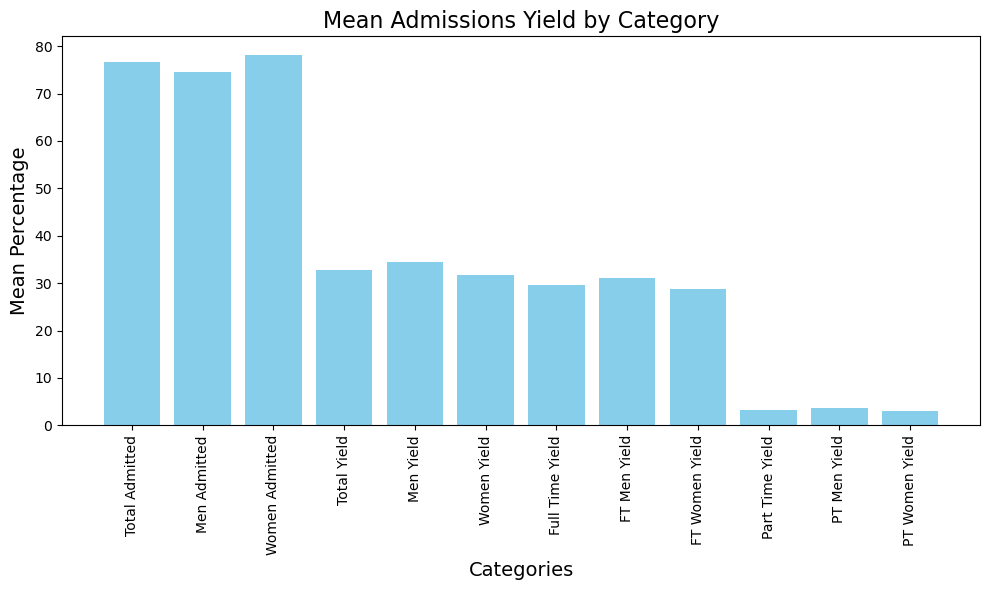

In [ ]:
# Assuming you have the summary statistics DataFrame named summary_stats

# Define the labels for the categories
labels = ['DRVADM2022.Percent admitted - total', 
          'DRVADM2022.Percent admitted - men', 
          'DRVADM2022.Percent admitted - women', 
          'DRVADM2022.Admissions yield - total', 
          'DRVADM2022.Admissions yield - men', 
          'DRVADM2022.Admissions yield - women', 
          'DRVADM2022.Admissions yield - full time', 
          'DRVADM2022.Admissions yield - full time men', 
          'DRVADM2022.Admissions yield - full time women', 
          'DRVADM2022.Admissions yield - part time', 
          'DRVADM2022.Admissions yield - part time men', 
          'DRVADM2022.Admissions yield - part time women']

# Define the mapping of original labels to shorter strings
label_mapping = {
    'DRVADM2022.Percent admitted - total': 'Total Admitted',
    'DRVADM2022.Percent admitted - men': 'Men Admitted',
    'DRVADM2022.Percent admitted - women': 'Women Admitted',
    'DRVADM2022.Admissions yield - total': 'Total Yield',
    'DRVADM2022.Admissions yield - men': 'Men Yield',
    'DRVADM2022.Admissions yield - women': 'Women Yield',
    'DRVADM2022.Admissions yield - full time': 'Full Time Yield',
    'DRVADM2022.Admissions yield - full time men': 'FT Men Yield',
    'DRVADM2022.Admissions yield - full time women': 'FT Women Yield',
    'DRVADM2022.Admissions yield - part time': 'Part Time Yield',
    'DRVADM2022.Admissions yield - part time men': 'PT Men Yield',
    'DRVADM2022.Admissions yield - part time women': 'PT Women Yield'
}

# Replace the original labels with the shorter strings
short_labels = [label_mapping[label] for label in labels]

# Extract the mean values from the summary statistics DataFrame
dependent_target_variable = summary_statistics.loc['mean'][labels]

# Define the positions for the bars
independent_variable = range(len(labels))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(independent_variable, dependent_target_variable, color='skyblue')

# Add labels and title
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Mean Percentage', fontsize=14)
plt.title('Mean Admissions Yield by Category', fontsize=16)
plt.xticks(independent_variable,short_labels, rotation=90, fontsize=10, ha='center')

# Show the plot
plt.tight_layout()
plt.show()


## Workflow
0. Use the summary statistics dataframe
1. Identify the colums (features) for enrollment and store them in a list
2. Map this list to shorter names
3. Layer this linegraph visualization over the bar graph visualization

4. Apply this steps to the raw dataframe, comparing the admissions and enrollment across universities.

5. Literature Reviews:
    - For `What factors contribute most to student retention rates at Texas State University, and how can interventions be tailored to improve retention?`  (~ 31,000 results on Google Search):
        - [Risk factors and effectiveness of implemented academic interventions on student retention at a hispanic-serving institution](https://journals.sagepub.com/doi/abs/10.1177/1521025120986978)
        - [Rethinking College Student Retention](https://books.google.com/books?hl=en&lr=&id=sTukAQAAQBAJ&oi=fnd&pg=PT6&dq=What+factors+contribute+most+to+student+retention+rates+at+Texas+State+University,+and+how+can+interventions+be+tailored+to+improve+retention%3F&ots=MDcwTqV753&sig=YsFG2Sg5IFRddbOthuz6Gi3OXz8#v=onepage&q&f=false)
        - [The Role of Academic and Non-Academic Factors in Improving College Retention. ACT Policy Report.](https://eric.ed.gov/?id=ed485476)
        - [From Theory to Action: Exploring the Institutional Conditions for Student Retention](https://link.springer.com/chapter/10.1007/978-90-481-8598-6_2)
        - [Improving student retention in higher education Improving Teaching and Learning](https://files.eric.ed.gov/fulltext/EJ864028.pdf)
        - [SUPPORTING DATA-DRIVEN CONTINUOUS IMPROVEMENT IN COLLEGE STUDENT OUTCOMES](https://files.eric.ed.gov/fulltext/ED598244.pdf)
        - [Four Easy Ways to Improve Student Retention Rates](https://examsoft.com/resources/improve-student-retention-rates/)
        - [Texas Student Success Programs Poised for Impact](https://sr.ithaka.org/publications/texas-student-success-programs-poised-for-impact/)
        - [The Complex Nature of Student Retention at America's Community Colleges](https://journals.sagepub.com/doi/10.1177/00915521231163855?icid=int.sj-abstract.citing-articles.16)
        = [Indicators of Higher Education Equity in the United States](https://www.pellinstitute.org/pell-institute-indicators-2022/)
        - [A New Pathway to University Retention? Identity Fusion With University Predicts Retention Independently of Grades](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8009486/)
        - [And Now for Somw Good News: Trends in Student Retention at Community Colleges, 2004-2017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8380413/)
        - [Dropouts from higher education: An interdisciplinary review and synthesis](https://link.springer.com/article/10.1007/BF02214313)
        - [See, Reflect, and Act: Using Equity Audits to Enhance Student Succes](https://journals.humankinetics.com/view/journals/krj/9/4/article-p324.xml)
        - [What Matters to Student Success: A Review of the Literature](https://nces.ed.gov/npec/pdf/kuh_team_report.pdf)
        - [How First-Generation College and Underrepresented Students Can Overcome Obstacles to Attaining a College Education: Handbook for a New Family Tradition](https://digital.library.txst.edu/bitstreams/c4cc2870-995a-442d-b5aa-88d061997942/download)
        - [Recruiting Economically Disadvantaged Minority Students in Higher Education: An Assessment of Postsecondary Programs at Texas State University](https://digital.library.txstate.edu/bitstream/10877/3541/1/fulltext.pdf)
    - For `How does the availability of financial aid and scholarships correlate with graduation rates among different demographic groups within the Bobcat Community?` (~ 21,800 results on Google Search):
        - [Financial Aid and Persistence in Community Colleges: Assessing the Effectiveness of Federal and State Financial Aid Programs in Oklahoma](https://journals.sagepub.com/doi/abs/10.1177/0091552109348045)
        - [The Relationship Between State Financial Aid and Student Persistence and Success in College: An Examination of Hispanic Undocumented Immigrant Students in Texas Community Colleges](https://search.proquest.com/openview/83a16e0908c8ff4e49f5c9e02d3629ca/1?pq-origsite=gscholar&cbl=18750)
        - [Demography is Not Desinty](https://eric.ed.gov/?id=ED497044)
        - [Young Adults and Higher Education: Barriers and Breakthroughs to Success](https://www.jstor.org/stable/27795062)
        - [Income and Financial Aid Effects on Persistence and Degree Attainment in Public Colleges](https://epaa.asu.edu/index.php/epaa/article/view/176)
        - [Why Financial Aid Matters (or Does Not) for College Success: Toward a New Interdisciplinary Perspective](https://link.springer.com/book/10.1007/978-1-4020-9628-0#page=13)
        - [What Matters to Student Success: A Review of the Literature](https://nces.ed.gov/npec/pdf/Kuh_Team_Report.pdf)
        - [The Enrollment Effects of Merit-Based Financial Aid: Evidence from Georgia’s HOPE Program](https://www.journals.uchicago.edu/doi/abs/10.1086/506485)

7. Also, check the other types of education institutions, including programs and hybrid, as they draw people away from traditional higher education like universities.

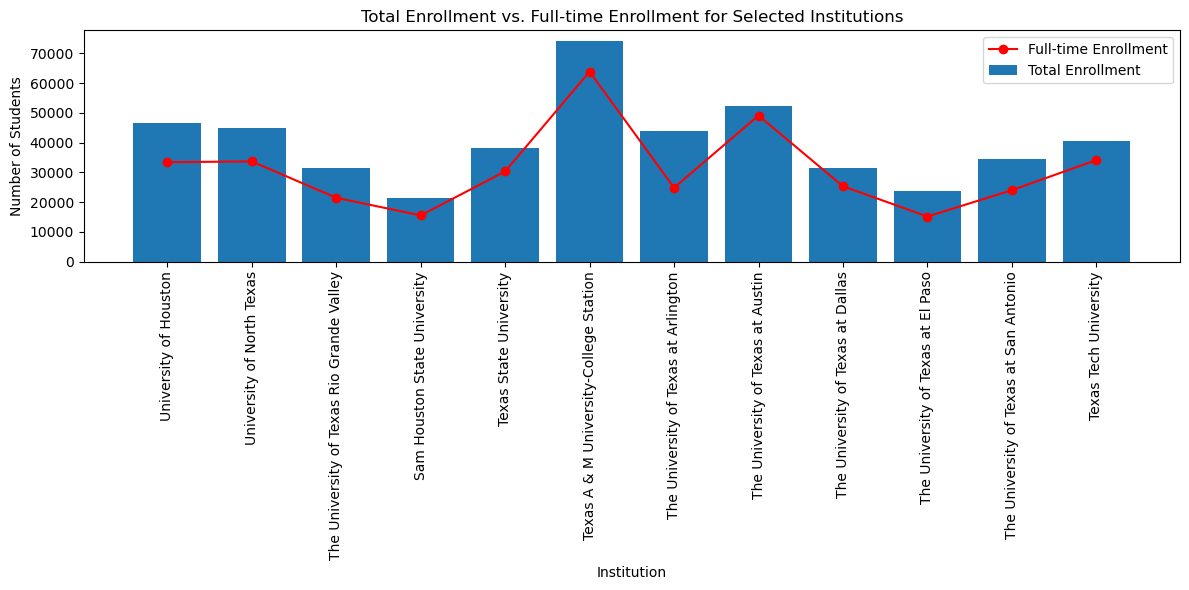

In [ ]:
# Define the institutions to include in the visualization
institutions = [
    'University of Houston',
    'University of North Texas',
    'The University of Texas Rio Grande Valley',
    'Sam Houston State University',
    'Texas State University',
    'Texas A & M University-College Station',
    'The University of Texas at Arlington',
    'The University of Texas at Austin',
    'The University of Texas at Dallas',
    'The University of Texas at El Paso',
    'The University of Texas at San Antonio',
    'Texas Tech University'
]

# Filter the data for the selected institutions
filtered_data = df_IPEDS_data_2022[df_IPEDS_data_2022['institution name'].isin(institutions)]

filtered_data

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['institution name'], filtered_data['DRVEF2022.Total  enrollment'], label='Total Enrollment')

# Plot the line graph
plt.plot(filtered_data['institution name'], filtered_data['DRVEF2022.Full-time enrollment'], color='red', marker='o', label='Full-time Enrollment')

# Add labels and title
plt.xlabel('Institution')
plt.ylabel('Number of Students')
plt.title('Total Enrollment vs. Full-time Enrollment for Selected Institutions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## IPEDS Data Collection:
*Year*: `2022`
- Selecting 91 univerisities based on these special characteristics:
    - USA Every State
    - Public, 4-year or above
    - Degree-granting
    - Highest Degree Offered - Doctor's degree - *
    - Degree-granting, primarily baccalaureate or above
    - Degree of urbanization (Locale) - City(Large) or City(Midsize) or City(Small)
    - Institution size category - 20,000 and above
    - Reporting method (academic) (look up what differentiates this from hybrid and program)
    - Has full-time first-time undergraduate students - Yes
    - All programs offered completely via distance education - No
- Variables

## Questions to Answer:
- `What factors contribute most to student retention rates at Texas State University, and how can interventions be tailored to improve retention?` 
- `How does the availability of financial aid and scholarships correlate with graduation rates among different demographic groups within the Bobcat Community?`

## This is what the Literature Review states is important:

## This is what the data shows:

## These are the limitations of the data (different convetions over the years, and what not)

## Variables to measure:
- Years: 2012 - 2022 (2022 - 2023)
- Retention Rates:
    - Gender
    - Ethnicity
- Student Financial Aid
    - PELL grants
    - Other grants
    - Scholarships
- Enrollment:
    - Full-time (by ethnicity and gender)
    - Part-Time (by ethnicity and gender)
- Faculty:
    - Full-Time
    - Part-Time
- Sraff:
    - Full-time:
    - Part-time:
- Ratios:
    - Student:Faculty (part-time and full-time)
    - Student:Staff (part-time and full-time)
- Finances:
    - What does the university invest its finances in

## List of all IPEDS frequently Used/Derived Vvariables:
- State abbreviationInfo
`#` of variables: 921
- FIPS state codeInfo
- Bureau of Economic Analysis (BEA) RegionsInfo
- Sector of institutionInfo
- Level of institutionInfo
- Control of institutionInfo
- Degree-granting statusInfo
- Historically Black College or UniversityInfo
- Tribal collegeInfo
- Degree of urbanization (Urban-centric locale)Info
- Postsecondary and Title IV institution indicatorInfo
- Institutional categoryInfo
- Carnegie Classification 2021: Basic (beginning 2021-22)Info
- Carnegie Classification 2015/2018/2021: Undergraduate Instructional Program (beginning 2015-16)Info
- Carnegie Classification 2015/2018/2021: Graduate Instructional Program (beginning 2015-16)Info
- Carnegie Classification 2015/2018/2021: Undergraduate Profile (beginning 2015-16)Info
- Carnegie Classification 2015/2018/2021 : Enrollment Profile (beginning 2015-16)Info
- Carnegie Classification 2015/2018/2021: Size and Setting (beginning 2015-16)Info
- Carnegie Classification 2018: Basic (beginning 2018-19)Info
- Carnegie Classification 2015: Basic (beginning 2015-16)Info
- Carnegie Classification 2005/2010: Basic (2005-06 to 2014-15)Info
- Carnegie Classification 2005/2010: Undergraduate Instructional Program (2005-06 to 2014-15)Info
- Carnegie Classification2005/2010: Graduate Instructional Program (2005-06 to 2014-15)Info
- Carnegie Classification 2005/2010: Undergraduate Profile (2005-06 to 2014-15)Info
- Carnegie Classification 2005/2010: Enrollment Profile (2005-06 to 2014-15)Info
- Carnegie Classification 2005/2010: Size and Setting (2005-06 to 2014-15)Info
- Carnegie Classification 1994/2000 (1994-95 to 2004-05)Info
- Land Grant InstitutionInfo
- Data Feedback Report comparison group category created by NCESInfo
- Data Feedback Report - Institution submitted a custom comparison group (beginning in 2010)Info
- Does institution have a tenure systemInfo
- Classification for 2-year postsecondary institutionsInfo
- Institution size categoryInfo
- Total price for in-district students living on campusInfo
- Total price for in-state students living on campusInfo
- Total price for out-of-state students living on campusInfo
- Total price for in-district students living off campus (not with family)Info
- Total price for in-state students living off campus (not with family)Info
- Total price for out-of-state students living off campus (not with family)Info
- Total price for in-district students living off campus (with family)Info
- Total price for in-state students living off campus (with family)Info
- Total price for out-of-state students living off campus (with family)Info
- Percent of full-time first-time undergraduates awarded any financial aidInfo
- Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aidInfo
- Average amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded federal grant aidInfo
- Average amount of federal grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded Pell grantsInfo
- Average amount of Pell grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded other federal grant aidInfo
- Average amount of other federal grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded state/local grant aidInfo
- Average amount of state/local grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded  institutional grant aidInfo
- Average amount of institutional grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded student loansInfo
- Average amount of student loans awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded federal student loansInfo
- Average amount of federal student loans awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded other student loansInfo
- Average amount of other student loans awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded any financial aidInfo
- Percent of full-time first-time undergraduates awarded federal grant aidInfo
- Average amount of federal grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded state/local grant aidInfo
- Average amount of state/local grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded  institutional grant aidInfo
- Average amount of institutional grant aid awarded to full-time first-time undergraduatesInfo
- Percent of full-time first-time undergraduates awarded student loansInfo
- Average amount of student loans awarded to full-time first-time undergraduatesInfo
- Average net price for students awarded grant or scholarship aid (current year)Info
- Average net price for students awarded grant or scholarship aid (prior year-1)Info
- Average net price for students awarded grant or scholarship aid (prior year-2)Info
- Average net price (income 0-30,000) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 30,001-48,000) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 48,001-75,000) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 75,001-110,000) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 110,001 or more) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 0-30,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income 30,001-48,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income 48,001-75,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income 75,001-110,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income over 110,000 )-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income 0-30,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price (income 30,001-48,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price (income 48,001-75,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price (income 75,001-110,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price (income over 110,000 )-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price for students awarded grant or scholarship aid (current year)Info
- Average net price for students awarded grant or scholarship aid (prior year-1)Info
- Average net price for students awarded grant or scholarship aid (prior year-2)Info
- Average net price (income 0-30,000) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 30,001-48,000) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 48,001-75,000) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 75,001-110,000) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 110,001 or more) for students awarded Title IV federal financial aid (current year)Info
- Average net price (income 0-30,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income 30,001-48,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income 48,001-75,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income 75,001-110,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income over 110,000)-students awarded Title IV federal financial aid (prior year-1)Info
- Average net price (income 0-30,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price (income 30,001-48,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price (income 48,001-75,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price (income 75,001-110,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Average net price (income over 110,000)-students awarded Title IV federal financial aid, (prior year-2)Info
- Percent admitted - totalInfo
- Percent admitted - menInfo
- Percent admitted - womenInfo
- Admissions yield - totalInfo
- Admissions yield - menInfo
- Admissions yield - womenInfo
- Admissions yield - full timeInfo
- Admissions yield - full time menInfo
- Admissions yield - full time womenInfo
- Admissions yield - part timeInfo
- Admissions yield - part time menInfo
- Admissions yield - part time womenInfo
- Total enrollmentInfo
- Full-time equivalent enrollment (Fall enrollment derivation)Info
- Full-time enrollmentInfo
- Part-time enrollmentInfo
- Institution size categoryInfo
- Undergraduate enrollmentInfo
- First-time degree/certificate-seeking undergraduate enrollmentInfo
- Transfer-in degree/certificate-seeking undergraduate enrollmentInfo
- Continuing degree/certificate-seeking undergraduate enrollmentInfo
- Nondegree/certificate-seeking undergraduate enrollmentInfo
- Graduate enrollmentInfo
- Full-time undergraduate enrollmentInfo
- Full-time first-time degree/certificate-seeking undergraduate enrollmentInfo
- Full-time transfer-in degree/certificate-seeking undergraduate enrollmentInfo
- Full-time continuing degree/certificate-seeking undergraduate enrollmentInfo
- Full-time nondegree/certificate-seeking undergraduate enrollmentInfo
- Full-time graduate enrollmentInfo
- Part-time undergraduate enrollmentInfo
- Part-time first-time degree/certificate-seeking undergraduate enrollmentInfo
- Part-time transfer-in degree/certificate-seeking undergraduate enrollmentInfo
- Part-time continuing degree/certificate-seeking undergraduate enrollmentInfo
- Part-time nondegree/certificate-seeking undergraduate enrollmentInfo
- Part-time graduate enrollmentInfo
- Percent of total enrollment that are American Indian or Alaska NativeInfo
- Percent of total enrollment that are Asian/Native Hawaiian/Pacific IslanderInfo
- Percent of total enrollment that are Asian (beginning in 2010)Info
- Percent of total enrollment that are Native Hawaiian or Other Pacific Islander (beginning in 2010)Info
- Percent of total enrollment that are Black, non-HispanicInfo
- Percent of total enrollment that are HispanicInfo
- Percent of total enrollment that are White, non-HispanicInfo
- Percent of total enrollment that are Race/ethnicity unknownInfo
- Percent of total enrollment that are U.S. NonresidentInfo
- Percent of total enrollment that are two or more races (beginning in 2008)Info
- Percent of total enrollment that are womenInfo
- Percent of undergraduate enrollment that are American Indian or Alaska NativeInfo
- Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific IslanderInfo
- Percent of undergraduate enrollment that are Asian (beginning in 2010)Info
- Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander (beginning in 2010)Info
- Percent of undergraduate enrollment that are Black or African AmericanInfo
- Percent of undergraduate enrollment that are Hispanic/LatinoInfo
- Percent of undergraduate enrollment that are WhiteInfo
- Percent of undergraduate enrollment that are two or more racesInfo
- Percent of undergraduate enrollment that are Race/ethnicity unknownInfo
- Percent of undergraduate enrollment that are U.S. NonresidentInfo
- Percent of undergraduate enrollment that are womenInfo
- Percent of graduate enrollment that are American Indian or Alaska NativeInfo
- Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific IslanderInfo
- Percent of graduate enrollment that are Asian (beginning in 2010)Info
- Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander (beginning in 2010)Info
- Percent of graduate enrollment that are Black or African AmericanInfo
- Percent of graduate enrollment that are Hispanic/LatinoInfo
- Percent of graduate enrollment that are WhiteInfo
- Percent of graduate enrollment that are two or more racesInfo
- Percent of graduate enrollment that are Race/ethnicity unknownInfo
- Percent of graduate enrollment that are U.S. NonresidentInfo
- Percent of graduate enrollment that are womenInfo
- Adult age (25-64) enrollment, all studentsInfo
- Adult age (25-64) enrollment, undergraduateInfo
- Adult age (25-64) enrollment, graduateInfo
- Adult age (25-64) enrollment, first-professional (included with graduate beginning in 2009)Info
- Adult age (25-64) enrollment, full-time studentsInfo
- Adult age (25-64) enrollment, full-time undergraduateInfo
- Adult age (25-64) enrollment, full-time graduateInfo
- Adult age (25-64) enrollment, full-time first-professional (included with graduate beginning in 2009)Info
- Adult age (25-64) enrollment, part-time studentsInfo
- Adult age (25-64) enrollment, part-time undergraduateInfo
- Adult age (25-64) enrollment, part-time graduateInfo
- Adult age (25-64) enrollment, part-time first-professional (included with graduate beginning in 2009)Info
- Percent of undergraduate enrollment under 18Info
- Percent of undergraduate enrollment 18-24Info
- Percent of undergraduate enrollment 25-64Info
- Percent of undergraduate enrollment 65 and overInfo
- Full-time retention rateInfo
- Part-time retention rateInfo
- Current year GRS cohort as a percent of entering classInfo
- Full-time, first-time, degree/certificate seeking undergraduates (GRS Cohort) as percent of all undergraduatesInfo
- Number of first-time undergraduates - in-stateInfo
- Percent of first-time undergraduates - in-stateInfo
- Number of first-time undergraduates - out-of-stateInfo
- Percent of first-time undergraduates - out-of-stateInfo
- Number of first-time undergraduates - foreign countriesInfo
- Percent of first-time undergraduates - foreign countriesInfo
- Number of first-time undergraduates - residence unknownInfo
- Percent of first-time undergraduates - residence unknownInfo
- Percent of students enrolled exclusively in distance education coursesInfo
- Percent of students enrolled in some but not all distance education coursesInfo
- Percent of students not enrolled in any distance education coursesInfo
- Percent of undergraduate students enrolled exclusively in distance education coursesInfo
- Percent of undergraduate students enrolled in some but not all distance education coursesInfo
- Percent of undergraduate students not enrolled in any distance education coursesInfo
- Percent of graduate students enrolled exclusively in distance education coursesInfo
- Percent of graduate students enrolled in some but not all distance education coursesInfo
- Percent of graduate students not enrolled in any distance education coursesInfo
- 12-month unduplicated headcountInfo
- Full-time 12-month unduplicated headcountInfo
- Part-time 12-month unduplicated headcountInfo
- 12-month full-time equivalent enrollmentInfo
- 12-month unduplicated headcount, undergraduateInfo
- Full-time undergraduate 12-month unduplicated headcountInfo
- Part-time undergraduate 12-month unduplicated headcountInfo
- 12-month unduplicated headcount, graduateInfo
- Full-time graduate 12-month unduplicated headcountInfo
- Part-time graduate 12-month unduplicated headcountInfo
- First-time degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Transfer-in degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Continuing degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Nondegree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Full-time undergraduate 12-month unduplicated headcountInfo
- Full-time first-time degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Full-time transfer-in degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Full-time continuing degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Full-time nondegree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Part-time undergraduate 12-month unduplicated headcountInfo
- Part-time first-time degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Part-time transfer-in degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Part-time continuing degree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Part-time nondegree/certificate-seeking undergraduate 12-month unduplicated headcountInfo
- Percent of 12-month unduplicated headcount that are American Indian or Alaska NativeInfo
- Percent of 12-month unduplicated headcount that are AsianInfo
- Percent of 12-month unduplicated headcount that are Black or African AmericanInfo
- Percent of 12-month unduplicated headcount that are Hispanic/LatinoInfo
- Percent of 12-month unduplicated headcount that are Native Hawaiian or Other Pacific IslanderInfo
- Percent of 12-month unduplicated headcount that are WhiteInfo
- Percent of 12-month unduplicated headcount that are two or more racesInfo
- Percent of 12-month unduplicated headcount that are race/ethnicity unknownInfo
- Percent of 12-month unduplicated headcount that are U.S. NonresidentInfo
- Percent of 12-month unduplicated headcount that are womenInfo
- Percent of undergraduate 12-month unduplicated headcount that are American Indian or Alaska NativeInfo
- Percent of undergraduate 12-month unduplicated headcount that are AsianInfo
- Percent of undergraduate 12-month unduplicated headcount that are Black or African AmericanInfo
- Percent of undergraduate 12-month unduplicated headcount that are Hispanic/LatinoInfo
- Percent of undergraduate 12-month unduplicated headcount that are Native Hawaiian or Other Pacific IslanderInfo
- Percent of undergraduate 12-month unduplicated headcount that are WhiteInfo
- Percent of undergraduate 12-month unduplicated headcount that are two or more racesInfo
- Percent of undergraduate 12-month unduplicated headcount that are race/ethnicity unknownInfo
- Percent of undergraduate 12-month unduplicated headcount that are U. S. NonresidentInfo
- Percent of undergraduate 12-month unduplicated headcount that are womenInfo
- Percent of graduate 12-month unduplicated headcount that are American Indian or Alaska NativeInfo
- Percent of graduate 12-month unduplicated headcount that are AsianInfo
- Percent of graduate 12-month unduplicated headcount that are Black or African AmericanInfo
- Percent of graduate 12-month unduplicated headcount that are Hispanic/LatinoInfo
- Percent of graduate 12-month unduplicated headcount that are Native Hawaiian or Other Pacific IslanderInfo
- Percent of graduate 12-month unduplicated headcount that are WhiteInfo
- Percent of graduate 12-month unduplicated headcount that are two or more racesInfo
- Percent of graduate 12-month unduplicated headcount that are race/ethnicity unknownInfo
- Percent of graduate 12-month unduplicated headcount that are U. S. NonresidentInfo
- Percent of graduate 12-month unduplicated headcount that are womenInfo
- Percent of 12-month unduplicated headcount enrolled exclusively in distance education coursesInfo
- Percent of 12-month unduplicated headcount enrolled in some but not all distance education coursesInfo
- Percent of 12-month unduplicated headcount not enrolled in any distance education coursesInfo
- Percent of undergraduate 12-month unduplicated headcount enrolled exclusively in distance education coursesInfo
- Percent of undergraduate 12-month unduplicated headcount enrolled in some but not all distance education coursesInfo
- Percent of undergraduate 12-month unduplicated headcount not enrolled in any distance education coursesInfo
- Percent of graduate 12-month unduplicated headcount enrolled exclusively in distance education coursesInfo
- Percent of graduate 12-month unduplicated headcount enrolled in some but not all distance education coursesInfo
- Percent of graduate 12-month unduplicated headcount not enrolled in any distance education coursesInfo
- Number of students receiving a Doctor's degreeInfo
- Number of students receiving a Master's degreeInfo
- Number of students receiving a Bachelor's degreeInfo
- Number of students receiving an Associate's degreeInfo
- Number of students receiving a Postbaccalaureate or Post-master's certificateInfo
- Number of students receiving a certificate of 1 but less than 4-yearsInfo
- Number of students receiving a certificate of less than 1-yearInfo
- Number of students receiving certificates of less than 12 weeks (beginning in 2019-20)Info
- Number of students receiving certificates of at least 12 weeks but less than 1 year (beginning in 2019-20)Info
- Doctor's degree - research/scholarship (new classification)Info
- Doctor's degree - professional practice (new classification)Info
- Doctor's degree - other (new classification)Info
- Master's degreeInfo
- Bachelor's degreeInfo
- Associate's degreeInfo
- Certificates of 2 but less than 4-yearsInfo
- Certificates of 1 but less than 2 yearsInfo
- Certificates of less-than 1-yearInfo
- Certificate of less than 12 weeks (beginning in 2019-20)Info
- Certificate of at least 12 weeks but less than 1 year (beginning in 2019-20)Info
- Postbaccalaureate certificatesInfo
- Post-master's certificatesInfo
- Doctor's degree - research/scholarship (new classification)Info
- Doctor's degree - professional practice (new classification)Info
- Doctor's degree - other (new classification)Info
- First professional degreeInfo
- Doctor's degreeInfo
- Master's degreeInfo
- Bachelor's degreeInfo
- Associate's degreeInfo
- Certificates of 2 but less than 4-yearsInfo
- Certificates of 1 but less than 2 yearsInfo
- Certificates of less-than 1-yearInfo
- Postbaccalaureate certificatesInfo
- Post-master's certificatesInfo
- First-professional certificateInfo
- First professional degreeInfo
- Doctor's degreeInfo
- Master's degreeInfo
- Bachelor's degreeInfo
- Associate's degreeInfo
- Certificates of 2 but less than 4-yearsInfo
- Certificates of 1 but less than 2 yearsInfo
- Certificates of less-than 1-yearInfo
- Postbaccalaureate certificatesInfo
- Post-master's certificatesInfo
- First-professional certificateInfo
- Graduation rate, total cohortInfo
- Graduation rate, menInfo
- Graduation rate, womenInfo
- Graduation rate, American Indian or Alaska NativeInfo
- Graduation rate, Asian/Native Hawaiian/Pacific IslanderInfo
- Graduation rate, Asian (beginning in 2011)Info
- Graduation rate, Native Hawaiian or Other Pacific Islander (beginning in 2011)Info
- Graduation rate, Black, non-HispanicInfo
- Graduation rate, HispanicInfo
- Graduation rate, White, non-HispanicInfo
- Graduation rate - two or more racesInfo
- Graduation rate, Race/ethnicity unknownInfo
- Graduation rate, Nonresident alienInfo
- Transfer-out rate, total cohortInfo
- Graduation rate - Bachelor degree within 4 years, totalInfo
- Graduation rate - Bachelor degree within 5 years, totalInfo
- Graduation rate - Bachelor degree within 6 years, totalInfo
- Graduation rate - Bachelor degree within 6 years, menInfo
- Graduation rate - Bachelor degree within 6 years, womenInfo
- Graduation rate - Bachelor degree within 6 years, American Indian or Alaska NativeInfo
- Graduation rate - Bachelor degree within 6 years, Asian/Native Hawaiian/Pacific IslanderInfo
- Graduation rate - Bachelor degree within 6 years, Asian (beginning in 2011)Info
- Graduation rate - Bachelor degree within 6 years, Native Hawaiian or other Pacific Islander (beginning in 2011)Info
- Graduation rate - Bachelor degree within 6 years, Black, non-HispanicInfo
- Graduation rate - Bachelor degree within 6 years, HispanicInfo
- Graduation rate - Bachelor degree within 6 years, White, non-HispanicInfo
- Graduation rate - Bachelor degree within 6 years, two or more racesInfo
- Graduation rate - Bachelor degree within 6 years, Race/ethnicity unknownInfo
- Graduation rate - Bachelor degree within 6 years, Nonresident alienInfo
- Transfer-out rate - Bachelor cohortInfo
- Graduation rate - supplementalInfo
- Pell Grant recipients - Overall graduation rate within 150 percent of normal timeInfo
- Pell Grant recipients - Bachelor's degree rate within 6 yearsInfo
- Direct Subsidized Loan recipients not receiving Pell Grants - Overall graduation rate within 150 percent of normal timeInfo
- Direct Subsidized Loan recipients not receiving Pell Grants - Bachelor's degree rate within 6 yearsInfo
- Did not receive Pell Grants or Direct Subsidized Loans - Overall graduation rate within 150 percent of normal timeInfo
- Did not receive Pell Grants or Direct Subsidized Loans - Bachelor's degree rate within 6 yearsInfo
- Percent full-time first-time receiving an award - 4 yearsInfo
- Percent full-time first-time receiving an award - 6 yearsInfo
- Percent full-time first-time receiving an award - 8 yearsInfo
- Percent full-time first-time still enrolled at same institution - 8 yearsInfo
- Percent full-time first-time subsequently enrolled at another institution - 8 yearsInfo
- Percent full-time first-time enrollment status unknown - 8 yearsInfo
- Percent full-time first-time receiving a certificate - 8 yearsInfo
- Percent full-time first-time receiving an associate's - 8 yearsInfo
- Percent full-time first-time receiving a bachelor's - 8 yearsInfo
- Percent full-time first-time, Pell grant recipients receiving an award - 4 yearsInfo
- Percent full-time first-time, Pell grant recipients receiving an award - 6 yearsInfo
- Percent full-time first-time, Pell grant recipients receiving an award - 8 yearsInfo
- Percent full-time first-time, Pell grant recipients still enrolled at same institution - 8 yearsInfo
- Percent full-time first-time, Pell grant recipients subsequently enrolled at another institution - 8 yearsInfo
- Percent full-time first-time, Pell grant recipients enrollment status unknown - 8 yearsInfo
- Percent full-time first-time, Pell grant recipients receiving a certificate - 8 yearsInfo
- Percent full-time first-time, Pell grant recipients receiving an associate's - 8 yearsInfo
- Percent full-time first-time, Pell grant recipients receiving a bachelor's - 8 yearsInfo
- Percent full-time first-time, non-Pell recipients receiving an award - 4 yearsInfo
- Percent full-time first-time, non-Pell recipients receiving an award - 6 yearsInfo
- Percent full-time first-time, non-Pell recipients receiving an award - 8 yearsInfo
- Percent full-time first-time, non-Pell recipients still enrolled at same institution - 8 yearsInfo
- Percent full-time first-time, non-Pell recipients subsequently enrolled at another institution - 8 yearsInfo
- Percent full-time first-time, non-Pell recipients enrollment status unknown - 8 yearsInfo
- Percent full-time first-time, non-Pell recipients receiving a certificate - 8 yearsInfo
- Percent full-time first-time, non-Pell recipients receiving an associate's - 8 yearsInfo
- Percent full-time first-time, non-Pell recipients receiving a bachelor's - 8 yearsInfo
- Percent part-time first-time receiving an award - 4 yearsInfo
- Percent part-time first-time receiving an award - 6 yearsInfo
- Percent part-time first-time receiving an award - 8 yearsInfo
- Percent part-time first-time still enrolled at same institution - 8 yearsInfo
- Percent part-time first-time subsequently enrolled at another institution - 8 yearsInfo
- Percent part-time first-time enrollment status unknown - 8 yearsInfo
- Percent part-time first-time receiving a certificate - 8 yearsInfo
- Percent part-time first-time receiving an associate's - 8 yearsInfo
- Percent part-time first-time receiving a bachelor's - 8 yearsInfo
- Percent part-time first-time, Pell grant recipients receiving an award - 4 yearsInfo
- Percent part-time first-time, Pell grant recipients receiving an award - 6 yearsInfo
- Percent part-time first-time, Pell grant recipients receiving an award - 8 yearsInfo
- Percent part-time first-time, Pell grant recipients still enrolled at same institution - 8 yearsInfo
- Percent part-time first-time, Pell grant recipients subsequently enrolled at another institution - 8 yearsInfo
- Percent part-time first-time, Pell grant recipients enrollment status unknown - 8 yearsInfo
- Percent part-time first-time, Pell grant recipients receiving a certificate - 8 yearsInfo
- Percent part-time first-time, Pell grant recipients receiving an associate's - 8 yearsInfo
- Percent part-time first-time, Pell grant recipients receiving a bachelor's - 8 yearsInfo
- Percent part-time first-time, non-Pell recipients receiving an award - 4 yearsInfo
- Percent part-time first-time, non-Pell recipients receiving an award - 6 yearsInfo
- Percent part-time first-time, non-Pell recipients receiving an award - 8 yearsInfo
- Percent part-time first-time, non-Pell recipients still enrolled at same institution - 8 yearsInfo
- Percent part-time first-time, non-Pell recipients subsequently enrolled at another institution - 8 yearsInfo
- Percent part-time first-time, non-Pell recipients enrollment status unknown - 8 yearsInfo
- Percent part-time first-time, non-Pell recipients receiving a certificate - 8 yearsInfo
- Percent part-time first-time, non-Pell recipients receiving an associate's - 8 yearsInfo
- Percent part-time first-time, non-Pell recipients receiving a bachelor's - 8 yearsInfo
- Percent full-time non-first-time receiving an award - 4 yearsInfo
- Percent full-time non-first-time receiving an award - 6 yearsInfo
- Percent full-time non-first-time receiving an award - 8 yearsInfo
- Percent full-time non-first-time still enrolled at same institution - 8 yearsInfo
- Percent full-time non-first-time subsequently enrolled at another institution - 8 yearsInfo
- Percent full-time non-first-time enrollment status unknown - 8 yearsInfo
- Percent full-time non-first-time receiving a certificate - 8 yearsInfo
- Percent full-time non-first-time receiving an associate's - 8 yearsInfo
- Percent full-time non-first-time receiving a bachelor's - 8 yearsInfo
- Percent full-time non-first-time, Pell grant recipients receiving an award - 4 yearsInfo
- Percent full-time non-first-time, Pell grant recipients receiving an award - 6 yearsInfo
- Percent full-time non-first-time, Pell grant recipients receiving an award - 8 yearsInfo
- Percent full-time non-first-time, Pell grant recipients still enrolled at same institution - 8 yearsInfo
- Percent full-time non-first-time, Pell grant recipients subsequently enrolled at another institution - 8 yearsInfo
- Percent full-time non-first-time, Pell grant recipients enrollment status unknown - 8 yearsInfo
- Percent full-time non-first-time, Pell grant recipients receiving a certificate - 8 yearsInfo
- Percent full-time non-first-time, Pell grant recipients receiving an associate's - 8 yearsInfo
- Percent full-time non-first-time, Pell grant recipients receiving a bachelor's - 8 yearsInfo
- Percent full-time non-first-time, non-Pell recipients receiving an award - 4 yearsInfo
- Percent full-time non-first-time, non-Pell recipients receiving an award - 6 yearsInfo
- Percent full-time non-first-time, non-Pell recipients receiving an award - 8 yearsInfo
- Percent full-time non-first-time, non-Pell recipients still enrolled at same institution - 8 yearsInfo
- Percent full-time non-first-time, non-Pell recipients subsequently enrolled at another institution - 8 yearsInfo
- Percent full-time non-first-time, non-Pell recipients enrollment status unknown - 8 yearsInfo
- Percent full-time non-first-time, non-Pell recipients receiving a certificate - 8 yearsInfo
- Percent full-time non-first-time, degree/certificate-seeking non-recipients receiving an associate's - 8 yearsInfo
- Percent full-time non-first-time, non-Pell recipients receiving a bachelor's - 8 yearsInfo
- Percent part-time non-first-time receiving an award - 4 yearsInfo
- Percent part-time non-first-time receiving an award - 6 yearsInfo
- Percent part-time non-first-time receiving an award - 8 yearsInfo
- Percent part-time non-first-time still enrolled at same institution - 8 yearsInfo
- Percent part-time non-first-time subsequently enrolled at another institution - 8 yearsInfo
- Percent part-time non-first-time enrollment status unknown - 8 yearsInfo
- Percent part-time non-first-time receiving a certificate - 8 yearsInfo
- Percent part-time non-first-time receiving an associate's - 8 yearsInfo
- Percent part-time non-first-time receiving a bachelor's - 8 yearsInfo
- Percent part-time non-first-time, Pell grant recipients receiving an award - 4 yearsInfo
- Percent part-time non-first-time, Pell grant recipients receiving an award - 6 yearsInfo
- Percent part-time non-first-time, Pell grant recipients receiving an award - 8 yearsInfo
- Percent part-time non-first-time, Pell grant recipients still enrolled at same institution - 8 yearsInfo
- Percent part-time non-first-time, Pell grant recipients subsequently enrolled at another institution - 8 yearsInfo
- Percent part-time non-first-time, Pell grant recipients enrollment status unknown - 8 yearsInfo
- Percent part-time non-first-time, Pell grant recipients receiving a certificate - 8 yearsInfo
- Percent part-time non-first-time, Pell grant recipients receiving an associate's - 8 yearsInfo
- Percent part-time non-first-time, Pell grant recipients receiving a bachelor's - 8 yearsInfo
- Percent part-time non-first-time, non-Pell recipients receiving an award - 4 yearsInfo
- Percent part-time non-first-time, non-Pell recipients receiving an award - 6 yearsInfo
- Percent part-time non-first-time, non-Pell recipients receiving an award - 8 yearsInfo
- Percent part-time non-first-time, non-Pell recipients still enrolled at same institution - 8 yearsInfo
- Percent part-time non-first-time, non-Pell recipients subsequently enrolled at another institution - 8 yearsInfo
- Percent part-time non-first-time, non-Pell recipients enrollment status unknown - 8 yearsInfo
- Percent part-time non-first-time, non-Pell recipients receiving a certificate - 8 yearsInfo
- Percent part-time non-first-time, non-Pell recipients receiving an associate's - 8 yearsInfo
- Percent part-time non-first-time, non-Pell recipients receiving a bachelor's - 8 yearsInfo
- Core revenues, total dollars (GASB)Info
- Tuition and fees as a percent of core revenues (GASB)Info
- State appropriations as percent of core revenues (GASB)Info
- Local appropriations as a percent of core revenues (GASB)Info
- Government grants and contracts as a percent of core revenues (GASB)Info
- Private gifts, grants, and contracts as a percent of core revenues (GASB)Info
- Investment return as a percent of core revenues (GASB)Info
- Other revenues as a percent of core revenues (GASB)Info
- Core revenues, total dollars (FASB)Info
- Tuition and fees as a percent of core revenues (FASB)Info
- Government grants and contracts as a percent of core revenues (FASB)Info
- Private gifts, grants, and contracts as a percent of core revenues (FASB)Info
- Investment return as a percent of core revenues (FASB)Info
- Other revenues as a percent of core revenues (FASB)Info
- Core revenues, total dollars (for-profit institutions)Info
- Tuition and fees as a percent of core revenues (for-profit institutions)Info
- Government appropriations, grants, and contracts as a percent of core revenues (for-profit institutions)Info
- Government grants and contracts as a percent of core revenues (for-profit institutions beginning in FY 2014)Info
- Private gifts, grants, contracts as a percent of core revenues (for-profit institutions beginning in FY 2014)Info
- Investment return as a percent of core revenues (for-profit institutions beginning in FY 2014)Info
- Sales and services of educational activities as a percent of core revenues (for-profit institutions)Info
- Other revenues as a percent of core revenues (for-profit institutions)Info
- Revenues from tuition and fees per FTE (GASB)Info
- Revenues from state appropriations per FTE (GASB)Info
- Revenues from local appropriations per FTE (GASB)Info
- Revenues from government grants and contracts per FTE (GASB)Info
- Revenues from private gifts, grants, and contracts per FTE (GASB)Info
- Revenues from investment return per FTE (GASB)Info
- Other core revenues per FTE (GASB)Info
- Revenues from tuition and fees per FTE (FASB)Info
- Revenues from government grants and contracts per FTE (FASB)Info
- Revenues from private gifts, grants, and contracts per FTE (FASB)Info
- Revenues from investment return per FTE (FASB)Info
- Other core revenues per FTE (FASB)Info
- Revenues from tuition and fees per FTE (for-profit institutions)Info
- Revenues from government appropriations, grants and contracts per FTE (for-profit institutions)Info
- Revenues from government grants and contracts per FTE (for-profit institutions beginning in FY 2014)Info
- Revenues from private gifts, grants, contracts per FTE (for-profit institutions beginning in FY 2014)Info
- Revenues from investment return per FTE (for-profit institutions beginning in FY 2014)Info
- Revenues from sales and services of educational activities per FTE (for-profit institutions)Info
- Other core revenues per FTE (for-profit institutions)Info
- Core expenses, total dollars (GASB)Info
- Instruction expenses as a percent of total core expenses (GASB)Info
- Research expenses as a percent of total core expenses (GASB)Info
- Public service expenses as a percent of total core expenses (GASB)Info
- Academic support expenses as a percent of total core expenses (GASB)Info
- Student service expenses as a percent of total core expenses (GASB)Info
- Institutional support expenses as a percent of total core expenses (GASB)Info
- Other core expenses as a percent of total core expenses (GASB)Info
- Core expenses, total dollars (FASB)Info
- Instruction expenses as a percent of total core expenses (FASB)Info
- Research expenses as a percent of total core expenses (FASB)Info
- Public service expenses as a percent of total core expenses (FASB)Info
- Academic support expenses as a percent of total core expenses (FASB)Info
- Student service expenses as a percent of total core expenses (FASB)Info
- Institutional support expenses as a percent of total core expenses (FASB)Info
- Other core expenses as a percent of total core expenses (FASB)Info
- Core expenses, total dollars (for-profit institutions)Info
- Instruction expenses as a percent of total core expenses (for-profit institutions)Info
- Research expenses as a percent of total core expenses (for-profit institutions beginning in FY 2014)Info
- Public service expenses as a percent of total core expenses (for-profit institutions beginning in FY 2014)Info
- Academic and institutional support, and student service expenses as a percent of total core expenses (for-profit institutions)Info
- Academic support expenses as a percent of total core expenses (for-profit institutions beginning in FY 2014)Info
- Student service expenses as a percent of total core expenses (for-profit institutions beginning in FY 2014)Info
- Institutional support expenses as a percent of total core expenses (for-profit institutions beginning in FY 2014)Info
- Other core expenses as a percent of total core expenses (for-profit institutions)Info
- Instruction expenses per FTE (GASB)Info
- Research expenses per FTE (GASB)Info
- Public service expenses per FTE (GASB)Info
- Academic support expenses per FTE (GASB)Info
- Student service expenses per FTE (GASB)Info
- Institutional support expenses per FTE (GASB)Info
- All other core expenses per FTE (GASB)Info
- Instruction expenses per FTE (FASB)Info
- Research expenses per FTE (FASB)Info
- Public service expenses per FTE (FASB)Info
- Academic support expenses per FTE (FASB)Info
- Student service expenses per FTE (FASB)Info
- Institutional support expenses per FTE (FASB)Info
- All other core expenses per FTE (FASB)Info
- Instruction expenses per FTE (for-profit institutions)Info
- Research expenses per FTE (for-profit institutions beginning in FY 2014)Info
- Public service expenses per FTE (for-profit institutions beginning in FY 2014)Info
- Academic and institutional support, and student services expense per FTE (for-profit institutions)Info
- Academic support expenses per FTE (for-profit institutions beginning in FY 2014)Info
- Student service expenses per FTE (for-profit institutions beginning in FY 2014)Info
- Institutional support expenses per FTE (for-profit institutions beginning in FY 2014)Info
- All other core expenses per FTE (for-profit institutions)Info
- Salaries and wages for core expenses as a percent of total core expenses (GASB)Info
- Salaries and wages for instruction as a percent of total expenses for instruction (GASB)Info
- Salaries and wages for research as a percent of total expenses for research (GASB)Info
- Salaries and wages for public service as a percent of total expenses for public service (GASB)Info
- Salaries and wages for academic support as a percent of total expenses for academic support (GASB)Info
- Salaries and wages for student services as a percent of total expenses for student services (GASB)Info
- Salaries and wages for institutional support as a percent of total expenses for institutional support (GASB)Info
- Salaries and wages for other core expense functions as a percent of total expenses for other core expense functions (GASB)Info
- Total salaries, wages, and benefits as a percent of total expenses (GASB)Info
- Total salaries and wages as a percent of total expenses (GASB)Info
- Salaries and wages for core expenses as a percent of total core expenses (FASB)Info
- Salaries and wages for instruction as a percent of total expenses for instruction (FASB)Info
- Salaries and wages for research as a percent of total expenses for research (FASB)Info
- Salaries and wages for public service as a percent of total expenses for public service (FASB)Info
- Salaries and wages for academic support as a percent of total expenses for academic support (FASB)Info
- Salaries and wages for student services as a percent of total expenses for student services (FASB)Info
- Salaries and wages for institutional support as a percent of total expenses for institutional support (FASB)Info
- Salaries and wages for other core expense functions as a percent of total expenses for other core expense functions (FASB)Info
- Total salaries, wages, and benefits as a percent of total expenses (FASB)Info
- Total salaries and wages as a percent of total expenses (FASB)Info
- Salaries and wages for core expenses as a percent of total core expenses (for-profit institutions)Info
- Salaries and wages for instruction as a percent of total expenses for instruction (for-profit institutions)Info
- Salaries and wages for research as a percent of total expenses for research (for-profit institutions)Info
- Salaries and wages for public service as a percent of total expenses for public service (for-profit institutions)Info
- Salaries and wages for academic support as a percent of total expenses for academic support (for-profit institutions)Info
- Salaries and wages for student services as a percent of total expenses for student services (for-profit institutions)Info
- Salaries and wages for institutional support as a percent of total expenses for institutional support (for-profit institutions)Info
- Salaries and wages for other core expense functions as a percent of total expenses for other core expense functions (for-profit)Info
- Total salaries, wages, and benefits as a percent of total expenses (for-profit institutions)Info
- Total salaries and wages as a percent of total expenses (for-profit institutions)Info
- Salaries, wages, and benefit expenses for core expenses as a percent of total core expenses (GASB)Info
- Salaries, wages, and benefit expenses for instruction as a percent of total expenses for instruction (GASB)Info
- Salaries, wages, and benefit expenses for research as a percent of total expenses for research (GASB)Info
- Salaries, wages, and benefit expenses for public service as a percent of total expenses for public service (GASB)Info
- Salaries, wages, and benefit expenses for academic support as a percent of total expenses for academic support (GASB)Info
- Salaries, wages, and benefit expenses for student services as a percent of total expenses for student services (GASB)Info
- Salaries, wages, and benefit expenses for institutional support as a percent of total expenses for institutional support (GASB)Info
- Salaries, wages, and benefit expenses for other core expense functions as a percent of total expenses for other core expense functions (GASB)Info
- Total salaries, wages, and benefits as a percent of total expenses (GASB)Info
- Total salaries and wages as a percent of total expenses (GASB)Info
- Salaries, wages, and benefit expenses for core expenses as a percent of total core expenses (FASB)Info
- Salaries, wages, and benefit expenses for instruction as a percent of total expenses for instruction (FASB)Info
- Salaries, wages, and benefit expenses for research as a percent of total expenses for research (FASB)Info
- Salaries, wages, and benefit expenses for public service as a percent of total expenses for public service (FASB)Info
- Salaries, wages, and benefit expenses for academic support as a percent of total expenses for academic support (FASB)Info
- Salaries, wages, and benefit expenses for student services as a percent of total expenses for student services (FASB)Info
- Salaries, wages, and benefit expenses for institutional support as a percent of total expenses for institutional support (FASB)Info
- Salaries, wages, and benefit expenses for other core expense functions as a percent of total expenses for other core expense functions (FASB)Info
- Total salaries, wages, and benefits as a percent of total expenses (FASB)Info
- Total salaries and wages as a percent of total expenses (FASB)Info
- Salaries, wages, and benefit expenses for core expenses as a percent of total core expenses (for-profit institutions)Info
- Salaries, wages, and benefit expenses for instruction as a percent of total expenses for instruction (for-profit institutions)Info
- Salaries, wages, and benefit expenses for research as a percent of total expenses for research (for-profit institutions)Info
- Salaries, wages, and benefit expenses for public service as a percent of total expenses for public service (for-profit institutions)Info
- Salaries, wages, and benefit expenses for academic support as a percent of total expenses for academic support (for-profit institutions)Info
- Salaries, wages, and benefit expenses for student services as a percent of total expenses for student services (for-profit institutions)Info
- Salaries, wages, and benefit expenses for institutional support as a percent of total expenses for institutional support (for-profit institutions)Info
- Salaries, wages, and benefit expenses for other core expense functions as a percent of total expenses for other core expense functions (for-profit)Info
- Total salaries, wages, and benefits as a percent of total expenses (for-profit institutions)Info
- Total salaries and wages as a percent of total expenses (for-profit institutions)Info
- Endowment assets (year end) per FTE enrollment (GASB)Info
- Endowment assets (year end) per FTE enrollment (FASB)Info
- Equity ratio (GASB)Info
- Equity ratio (FASB)Info
- Equity ratio (for-profit institutions)Info
- Core revenues, total dollarsInfo
- Tuition and fees as a percent of core revenuesInfo
- State appropriations as percent of core revenues (GASB only)Info
- Local appropriations as a percent of core revenues (GASB only)Info
- Government grants and contracts as a percent of core revenuesInfo
- Private gifts, grants, and contracts as a percent of core revenues (FASB only)Info
- Investment return as a percent of core revenues (FASB only)Info
- Other revenues as a percent of core revenuesInfo
- Tuition and fee revenues per FTEInfo
- State and local government appropriation revenues per FTE (GASB only)Info
- Private gifts, grants, and contract revenues per FTE (FASB only)Info
- Investment return revenues per FTE (FASB only)Info
- All other core revenues per FTEInfo
- Core expenses, total dollarsInfo
- Instruction expenses per FTEInfo
- Research expenses per FTEInfo
- Academic support expenses per FTEInfo
- Public service expenses per FTEInfo
- Student services expenses per FTEInfo
- Institutional support expenses per FTEInfo
- All other core expenses per FTEInfo
- Academic and institutional support, and student services expenses per FTE (for-profit institutions only)Info
- Total FTE staffInfo
- Instructional,research and public service FTE staffInfo
- Instructional FTEInfo
- Research FTEInfo
- Public Service FTEInfo
- Librarians, Curators, and Archivists/Student and Academic Affairs and Other Education Services FTEInfo
- Librarians, Curators, and Archivists FTEInfo
- Student and Academic Affairs and Other Education Services FTEInfo
- Management FTEInfo
- Business and Financial Operations FTEInfo
- Computer, Engineering, and Science FTEInfo
- Community Service, Legal, Arts, and Media FTEInfo
- Healthcare FTEInfo
- Service, sales, office/admin support, natural resources, construction, maintenance, production, transportation & materials moving FTEInfo
- Service FTEInfo
- Sales and Related FTEInfo
- Office and Administrative Support FTEInfo
- Natural Resources, Construction, and Maintenance FTEInfo
- Production, Transportation, and Material Moving FTEInfo
- Average salary equated to 9 months of full-time instructional staff - all ranksInfo
- Average salary equated to 9 months of full-time instructional staff - professorsInfo
- Average salary equated to 9 months of full-time instructional staff - associate professorsInfo
- Average salary equated to 9 months of full-time instructional staff - assistant professorsInfo
- Average salary equated to 9 months of full-time instructional staff - instructorsInfo
- Average salary equated to 9 months of full-time instructional staff - lecturersInfo
- Average salary equated to 9 months of full-time instructional staff - No academic rankInfo
- Total FTE staffInfo
- Instructional,research and public service FTE staffInfo
- Executive/administrative and managerial FTE staffInfo
- Other professional FTE staffInfo
- Non-professional FTE staffInfo
- Average salary equated to 9-month contracts of full-time instructional staff - all ranksInfo
- Average salary equated to 9-month contracts of full-time instructional staff - professorsInfo
- Average salary equated to 9-month contracts of full-time instructional staff - associate professorsInfo
- Average salary equated to 9-month contracts of full-time instructional staff - assistant professorsInfo
- Average salary equated to 9-month contracts of full-time instructional staff - instructorsInfo
- Average salary equated to 9-month contracts of full-time instructional staff - lecturersInfo
- Average salary equated to 9-month contracts of full-time instructional staff - No academic rankInfo
- Physical books as a percent of the total library collectionInfo
- Physical media as a percent of the total library collectionInfo
- Physical serials as a percent of the total library collection (beginning in 2015-16)Info
- Digital/Electronic books as a percent of the total library collectionInfo
- Databases as a percent of the total library collectionInfo
- Digital/Electronic media as a percent of the total library collectionInfo
- Digital/Electronic serials as a percent of the total library collection (beginning in 2015-16)Info
- Salaries and wages from the library budget as a percent of total library expendituresInfo
- Fringe benefits paid out of the library budget as a percent of total library expendituresInfo
- One-time purchases of books, serial backfiles, and other materials as a percent of total library expendituresInfo
- Ongoing commitments to subscriptions as a percent of total library expendituresInfo
- All other materials/services as a percent of total library expendituresInfo
- Total operations and maintenance as a percent of total library expendituresInfo
- Total library expenditures per FTEInfo
- Total library FTE staffInfo
- Librarians FTE staffInfo
- Other professional FTE staffInfo
- All other paid FTE staff (Except Student Assistants)Info
- Student assistants FTEInfo
- Grand totalInfo
- Grand total menInfo
- Grand total womenInfo
- American Indian or Alaska Native totalInfo
- American Indian or Alaska Native menInfo
- American Indian or Alaska Native womenInfo
- Asian/Native Hawaiian/Other Pacific Islander totalInfo
- Asian/Native Hawaiian/Other Pacific Islander menInfo
- Asian/Native Hawaiian/Other Pacific Islander womenInfo
- Black or African American/Black non-Hispanic totalInfo
- Black or African American/Black non-Hispanic menInfo
- Black or African American/Black non-Hispanic womenInfo
- Hispanic or Latino/Hispanic totalInfo
- Hispanic or Latino/Hispanic menInfo
- Hispanic or Latino/Hispanic womenInfo
- White/White non-Hispanic totalInfo
- White/White non-Hispanic menInfo
- White/White non-Hispanic womenInfo
- Two or more races total (applicable in 2008-09)Info
- Two or more races men (applicable in 2008-09)Info
- Two or more races women (applicable in 2008-09)Info
- Race/ethnicity unknown totalInfo
- Race/ethnicity unknown menInfo
- Race/ethnicity unknown womenInfo
- Nonresident alien totalInfo
- Nonresident alien menInfo
- Nonresident alien womenInfo
- Science, technology, engineering and mathematics (STEM) total
- Grand total - STEM - Computer and information sciences
- Grand total - STEM - Engineering and engineering technologies
- Grand total - STEM - Biological and biomedical sciences
- Grand total - STEM - Mathematics and statistics
- Grand total - STEM - Physical sciences
- Grand total - STEM - Science technologies
- Grant total - Non-STEM
- Degrees total - Associate's degree
- Degrees total - Bachelor's degree
- Degrees total - Master's degree
- Degrees total - Doctor's degree (for 2008-09 old and new classifications are combined)
- Degrees total - First-professional degree
- Degrees total - Certificates below the baccalaureate total
- Degrees total - Award of less than 1 academic year
- Degrees total - Award of at least 1 but less than 2 academic years
- Degrees total - Award of at least 2 but less than 4 academic years
- Certificates total - Advanced certificates total (above the baccalaureate)l
- Revised sectorInfo
- Revised Carnegie classification codeInfo
- Selectivity (4-year institutions)Info
- First-time, full-time, degree/certificate-seeking undergraduates, 2001-02Info
- On-campus room and board and other expenses, 1999-2000Info
- Percent of students living On-campus 1999-2000Info
- On-campus room and board and other expenses, 2000-01Info
- Percent of students living On-campus 2000-01Info
- On-campus room and board and other expenses, 2001-02Info
- Percent of students living On-campus 2001-02Info
- Off-campus (not with family) room and board and other expenses, 1999-2000Info
- Percent of students living Off-campus (not with family) 1999-2000Info
- Off-campus (not with family) room and board and other expenses, 2000-01Info
- Percent of students living Off-campus (not with family) 2000-01Info
- Off-campus (not with family) room and board and other expenses, 2001-02Info
- Percent of students living Off-campus (not with family) 2001-02Info
- Off-campus (with family) other expenses, 1999-2000Info
- Percent of students living Off-campus (with family) 1999-2000Info
- Off-campus (with family) other expenses, 2000-01Info
- Percent of students living Off-campus (with family) 2000-01Info
- Off-campus (with family) other expenses, 2001-02Info
- Percent of students living Off-campus (with family) 2001-02Info
- Percentage of undergraduates who were full-time freshmen 2001-02Info
- Percent of students in district 1999-2000Info
- Percent of students in state 1999-2000Info
- Percent of students out-of-state 1999-2000Info
- Percent of students in district 2000-01Info
- Percent of students in state 2000-01Info
- Percent of students out-of-state 2000-01Info
- Percent of students in district 2001-02Info
- Percent of students in state 2001-02Info
- Percent of students out-of-state 2001-02Info
- On-campus room and board and other expenses for relevant institutions 1999-2000Info
- On-campus room and board and other expenses for relevant institutions 2000-01Info
- On-campus room and board and other expenses for relevant institutions 2001-02Info
- Off-campus (not with family) room and board and other expenses for relevant institutions 1999-2000Info
- Off-campus (not with family) room and board and other expenses for relevant institutions 2000-01Info
- Off-campus (not with family) room and board and other expenses for relevant institutions 2001-02Info
- Off-campus (with family) room and board and other expenses for relevant institutions 1999-2000Info
- Off-campus (with family) room and board and other expenses for relevant institutions 2000-01Info
- Off-campus (with family) room and board and other expenses for relevant institutions 2001-02Info
- Percentage of full-time freshmen who received federal grants, centile rangesInfo
- Tuition and fees, centile rangesInfo
- Percentage of full-time freshmen who were non-white, centile rangesInfo
- 12-month enrollment, centile rangesInfo
- Percentage of undergraduates who were full-time freshmen, centile rangesInfo
- Percentage of full-time freshmen who were non-whiteInfo
- Price of attendance composite 1999-2000Info
- Price of attendance composite 2000-01Info
- Price of attendance composite 2001-02Info
- Tuition and fees composite, 1999-2000Info
- Tuition and fees composite, 2000-01Info
- Tuition and fees composite, 2001-02Info
- Books and supplies 1999-2000Info
- Books and supplies 2000-01Info
- Books and supplies 2001-02Info
- Housing expenses composite 1999-2000Info
- Housing expenses composite 2000-01Info
- Housing expenses composite 2001-02Info
- Dollar change in price of attendance, 1999-2000 to 2000-01Info
- Dollar change in price of attendance, 2000-01 to 2001-02Info
- Dollar change in price of attendance, 1999-2000 to 2001-02Info
- Percentage change in price of attendance, 1999-2000 to 2000-01Info
- Percentage change in price of attendance, 2000-01 to 2001-02Info
- Percentage change in price of attendance, 1999-2000 to 2001-02Info
- In-district tuition and fees, 1999-2000Info
- In-state tuition and fees, 1999-2000Info
- Out-of-state tuition and fees, 1999-2000Info
- In-district tuition and fees, 2000-01Info
- In-state tuition and fees, 2000-01Info
- Out-of-state tuition and fees, 2000-01Info
- In-district tuition and fees, 2001-02Info
- In-state tuition and fees, 2001-02Info
- Out-of-state tuition and fees, 2001-02Info
- Average amount of federal grants received in 1999-2000Info
- Percentage of full-time freshmen receiving federal grants in 1999-2000Info
- Average amount of federal grants received in 2000-01Info
- Percentage of full-time freshmen receiving federal grants in 2000-01Info
- Average amount of federal grants received in 2001-02Info
- Percentage of full-time freshmen receiving federal grants in 2001-02Info
- Average amount of state grants received in 1999-2000Info
- Percentage of full-time freshmen receiving state grants in 1999-2000Info
- Average amount of state grants received in 2000-01Info
- Percentage of full-time freshmen receiving state grants in 2000-01Info
- Average amount of state grants received in 2001-02Info
- Percentage of full-time freshmen receiving state grants in 2001-02Info
- Average amount of institutional grants received in 1999-2000Info
- Percentage of full-time freshmen receiving institutional grants in 1999-2000Info
- Average amount of institutional grants received in 2000-01Info
- Percentage of full-time freshmen receiving institutional grants in 2000-01Info
- Average amount of institutional grants received in 2001-02Info
- Percentage of full-time freshmen receiving institutional grants in 2001-02Info
- Average amount of loans received in 1999-2000Info
- Percentage of full-time freshmen receiving loans in 1999-2000Info
- Average amount of loans received in 2000-01Info
- Percentage of full-time freshmen receiving loans in 2000-01Info
- Average amount of loans received in 2001-02Info
- Percentage of full-time freshmen receiving loans in 2001-02Info
- Total aid composite 1999-2000Info
- Total aid composite 2000-01Info
- Total aid composite 2001-02Info
- Total grants composite 1999-2000Info
- Total grants composite 2000-01Info
- Total grants composite 2001-02Info
- Dollar change in total aid, 1999-2000 to 2000-01Info
- Dollar change in total aid, 2000-01 to 2001-02Info
- Dollar change in total grants, 1999-2000 to 2000-01Info
- Dollar change in total grants, 2000-01 to 2001-02Info
- Dollar change in total aid, 1999-2000 to 2001-02Info
- Percentage change in total aid 1999-2000 to 2001-02Info
- Dollar change in total grants, 1999-2000 to 2001-02Info
- Percentage change in total grants 1999-2000 to 2001-02Info
- Percentage change in total aid 1999-2000 to 2000-01Info
- Percentage change in total aid 2000-01 to 2001-02Info
- Percentage change in total grants 1999-2000 to 2000-01Info
- Percentage change in total grants 2000-01 to 2001-02Info
- Net price (all aid) 1999-2000Info
- Net price (all aid) 2000-01Info
- Net price (all aid) 2001-02Info
- Net price (grants) 1999-2000Info
- Net price (grants) 2000-01Info
- Net price (grants) 2001-02Info
- Dollar change in net price (all aid), 1999-2000 to 2000-01Info
- Dollar change in net price (all aid), 2000-01 to 2001-02Info
- Dollar change in net price (grants), 1999-2000 to 2000-01Info
- Dollar change in net price (grant), 2000-01 to 2001-02Info
- Percentage change in net price (all aid), 1999-2000 to 2000-01Info
- Percentage change in net price (all aid), 2000-01 to 2001-02Info
- Percentage change in net price (all aid), 1999-2000 to 2001-02Info
- Percentage change in net price (grants), 1999-2000 to 2000-01Info
- Percentage change in net price (grants), 2000-01 to 2001-02Info
- Percentage change in net price (grants), 1999-2000 to 2001-02Info
- Dollar change in net price (all aid), 1999-2000 to 2001-02Info
- Dollar change in net price (grants), 1999-2000 to 2001-02Info
- Index of change in price of attendanceInfo
- Index of change in net price (all aid)Info
- Index of change in net price (grants)Info
- Index of change in tuition and feesInfo
- Index of change in price of attendance using HECAInfo
- Index of change in net price (all aid) using HECAInfo
- Index of change in net price (grants) using HECAInfo
- Index of change in tuition and fees using HECAInfo
- Grand total (excluding non-resident aliens), 2001-02Info
- Total men (excluding non-resident aliens), 2001-02Info
- Total women (excluding non-resident aliens), 2001-02Info
- White non-Hispanic, 2001-02Info
- Black non-Hispanic, 2001-02Info
- Hispanic, 2001-02Info
- Asian or Pacific Islander, 2001-02Info
- American Indian or Alaska Native, 2001-02Info
- Race/ethnicity unknown, 2001-02Info
- Grand total (excluding non-resident aliens), 1996-97Info
- Total men (excluding non-resident aliens), 1996-97Info
- Total women (excluding non-resident aliens), 1996-97Info
- White non-Hispanic, 1997-97Info
- Black non-Hispanic, 1996-97Info
- Hispanic, 1996-97Info
- Asian or Pacific Islander, 1996-97Info
- American Indian or Alaska Native, 1996-97Info
- Race/ethnicity unknown, 1996-97Info
- Associate's degree
- Bachelor's degree
- Master's degree
- Doctoral degree
- First professional degree
- Total awards - 1 - Agriculture and conservation sciences
- Total awards - 2 - Computer and information sciences
- Total awards - 3 - Education
- Total awards - 4 - Engineering and engineering-related technologies
- Total awards - 5 - Foreign languages and literatures
- Total awards - 6 - Biological and life sciences
- Total awards - 7 - Mathematics
- Total awards - 8 - Physical sciences
- Total awards - 9 - Protective services and criminal justice
- Total awards - 10 - Social work
- Total awards - 11 - Nursing
- Total awards - 12 - Health professions and related sciences
- Total awards - 0 - Other areas (non-national need)